In [1]:
.libPaths("/home/keionn001/.conda/envs/r-new/lib/R/library")
suppressPackageStartupMessages({
library(purrr)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(scater)
library(scuttle)
library(Seurat)
library(patchwork)
library(BiocParallel)
library(ggbeeswarm)
library(SingleCellExperiment)
library(scry)})

**taking only the one with AD and HC subsetted, for the CD4 population only**

In [2]:
t.cells=readRDS(file="./GSE134577-csf/reclust.t.cells.RDS")
Idents(object = t.cells) <- 't.cells.snn_res.0.5'
CD4cells=subset(t.cells,idents = c(2,7,4), invert = T)
CD4cells$old.ident=Idents(CD4cells) #put the old Ident somewhere
levels(CD4cells)
new_names <- c("0", "1", "3", "5", "6","1","0") #merging clust8,1 and 0,9 together respectively
names(new_names) <- levels(CD4cells)

CD4cells <- RenameIdents(object = CD4cells, new_names)
DefaultAssay(t.cells) <- "RNA"


sceCD4 <-  as.SingleCellExperiment(CD4cells,assay="RNA")
sceCD4=sceCD4[,sceCD4$sampletype%in%c("AD","HC")]
CD4cells=subset(x = CD4cells, subset = (sampletype == "HC" | sampletype == "AD"))
AD_and_HCcells=colnames(sceCD4[sceCD4$sampletype %in% c("AD", "HC"),])
options(future.globals.maxSize = 4000 * 1024^2)
#put back the PC and UMAP embeddings
# Put back the PC and UMAP embeddings for the subset
sceCD4@int_colData@listData$reducedDims$UMAP <- CD4cells@reductions$umap@cell.embeddings[AD_and_HCcells, , drop = FALSE]
sceCD4@int_colData@listData$reducedDims$PCA <- CD4cells@reductions$pca@cell.embeddings[AD_and_HCcells, , drop = FALSE]
#check that we only have 0,1,3,5,6 clust
colLabels(sceCD4)=CD4cells@active.ident
colLabels(sceCD4)

[1] "0" "1" "3" "5" "6" "8" "9"

HC_HC1_AAACCTGGTTCTGAAC-1 HC_HC1_AAACGGGAGCCAGAAC-1 HC_HC1_AAAGATGAGGGCTTCC-1 
                        0                         3                         1 
HC_HC1_AAAGATGGTGAACCTT-1 HC_HC1_AAAGATGGTTAAGAAC-1 HC_HC1_AAAGTAGAGAGTGAGA-1 
                        3                         5                         1 
HC_HC1_AAAGTAGAGTAGGTGC-1 HC_HC1_AAAGTAGCAGGTCTCG-1 HC_HC1_AAATGCCCACACATGT-1 
                        5                         0                         5 
HC_HC1_AAATGCCCAGACAAAT-1 HC_HC1_AAATGCCCAGCCTTGG-1 HC_HC1_AAATGCCCATCACAAC-1 
                        0                         3                         6 
HC_HC1_AAATGCCTCCGCTGTT-1 HC_HC1_AACCATGGTACTTAGC-1 HC_HC1_AACCATGTCAGCGACC-1 
                        1                         6                         1 
HC_HC1_AACCATGTCGGTGTCG-1 HC_HC1_AACCGCGCATGGGAAC-1 HC_HC1_AACTCCCAGCTTATCG-1 
                        3                         5                         0 
HC_HC1_AACTCCCCAGCGATCC-1 HC_HC1_AACTCCCTCTCCGGTT-1 HC_HC1_AACTCTTAGGTAGCTG-1 
                        0                         5                         3 
HC_HC1_AACTCTTTCTATCCCG-1 HC_HC1_AACTGGTCAATCGGTT-1 HC_HC1_AACTTTCGTCGCTTTC-1 
                        5                         0                         1 
HC_HC1_AAGACCTAGGCATGGT-1 HC_HC1_AAGACCTGTCGCTTTC-1 HC_HC1_AAGACCTTCAAACCGT-1 
                        0                         0                         3 
HC_HC1_AAGCCGCCAGTAAGAT-1 HC_HC1_AAGGAGCAGGCATGGT-1 HC_HC1_AAGGAGCAGTGGGCTA-1 
                        0                         0                         1 
HC_HC1_AAGGAGCGTGTATGGG-1 HC_HC1_AAGGCAGCAATGACCT-1 HC_HC1_AAGGCAGCATTGGGCC-1 
                        0                         3                         1 
HC_HC1_AAGGCAGGTTTGGGCC-1 HC_HC1_AAGGCAGTCCGTACAA-1 HC_HC1_AAGGTTCAGTACGCGA-1 
                        3                         1                         5 
HC_HC1_AAGGTTCGTCGACTGC-1 HC_HC1_AAGGTTCTCTGGCGTG-1 HC_HC1_AAGTCTGGTCCAGTTA-1 
                        1                         3                         0 
HC_HC1_AATCCAGAGCCGCCTA-1 HC_HC1_AATCCAGAGTTCGCGC-1 HC_HC1_AATCCAGCAAACGTGG-1 
                        0                         0                         1 
HC_HC1_AATCCAGCAAGGTTCT-1 HC_HC1_AATCCAGCACCAGATT-1 HC_HC1_AATCGGTCACCTTGTC-1 
                        0                         0                         0 
HC_HC1_AATCGGTTCCGGCACA-1 HC_HC1_ACACCAAAGCCAGTTT-1 HC_HC1_ACACCAACAAGCCCAC-1 
                        6                         1                         3 
HC_HC1_ACACCCTCATACTACG-1 HC_HC1_ACACCGGCACTGTTAG-1 HC_HC1_ACACCGGTCGGTCCGA-1 
                        3                         5                         0 
HC_HC1_ACACTGAAGTCCTCCT-1 HC_HC1_ACACTGAGTACGAAAT-1 HC_HC1_ACACTGAGTCTGGAGA-1 
                        0                         1                         1 
HC_HC1_ACAGCTAAGAAGATTC-1 HC_HC1_ACAGCTAAGATCCGAG-1 HC_HC1_ACAGCTACACATGACT-1 
                        3                         6                         6 
HC_HC1_ACAGCTATCTGGCGAC-1 HC_HC1_ACATCAGCAAGGCTCC-1 HC_HC1_ACATCAGCACCGCTAG-1 
                        3                         0                         6 
HC_HC1_ACATCAGTCGCCAGCA-1 HC_HC1_ACATGGTGTCGGCATC-1 HC_HC1_ACCAGTAGTGCCTGCA-1 
                        1                         6                         3 
HC_HC1_ACCCACTGTAAAGTCA-1 HC_HC1_ACCGTAAAGAATTCCC-1 HC_HC1_ACCGTAACAATCACAC-1 
                        3                         1                         5 
HC_HC1_ACCGTAATCTCCCTGA-1 HC_HC1_ACCTTTACACAGCGTC-1 HC_HC1_ACCTTTACAGGCGATA-1 
                        0                         0                         1 
HC_HC1_ACCTTTAGTTCCAACA-1 HC_HC1_ACGAGCCGTCGCCATG-1 HC_HC1_ACGATACTCAGTTCGA-1 
                        3                         3                         0 
HC_HC1_ACGATACTCGTCCGTT-1 HC_HC1_ACGATGTCAATCCAAC-1 HC_HC1_ACGATGTCAGCTGTGC-1 
                        0                         0                         3 
HC_HC1_ACGATGTTCGCAAACT-1 HC_HC1_ACGCAGCAGCACCGCT-

In [3]:
#QC that we only have AD and HC samples
dim(counts(sceCD4))
levels(factor(colData(sceCD4)$sampletype))

[1] 33309 10094

[1] "AD" "HC"

In [4]:
logcounts(sceCD4) <-log(counts(sceCD4)+1)
sceCD4@int_colData@listData$reducedDims$UMAP <- CD4cells@reductions$umap@cell.embeddings[AD_and_HCcells, , drop = FALSE]
sceCD4@int_colData@listData$reducedDims$PCA <- CD4cells@reductions$pca@cell.embeddings[AD_and_HCcells, , drop = FALSE]

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”


Loading required package: edgeR

Loading required package: limma


Attaching package: ‘limma’


The following object is masked from ‘package:scater’:

    plotMDS


The following object is masked from ‘package:BiocGenerics’:

    plotMA



Attaching package: ‘edgeR’


The following object is masked from ‘package:SingleCellExperiment’:

    cpm




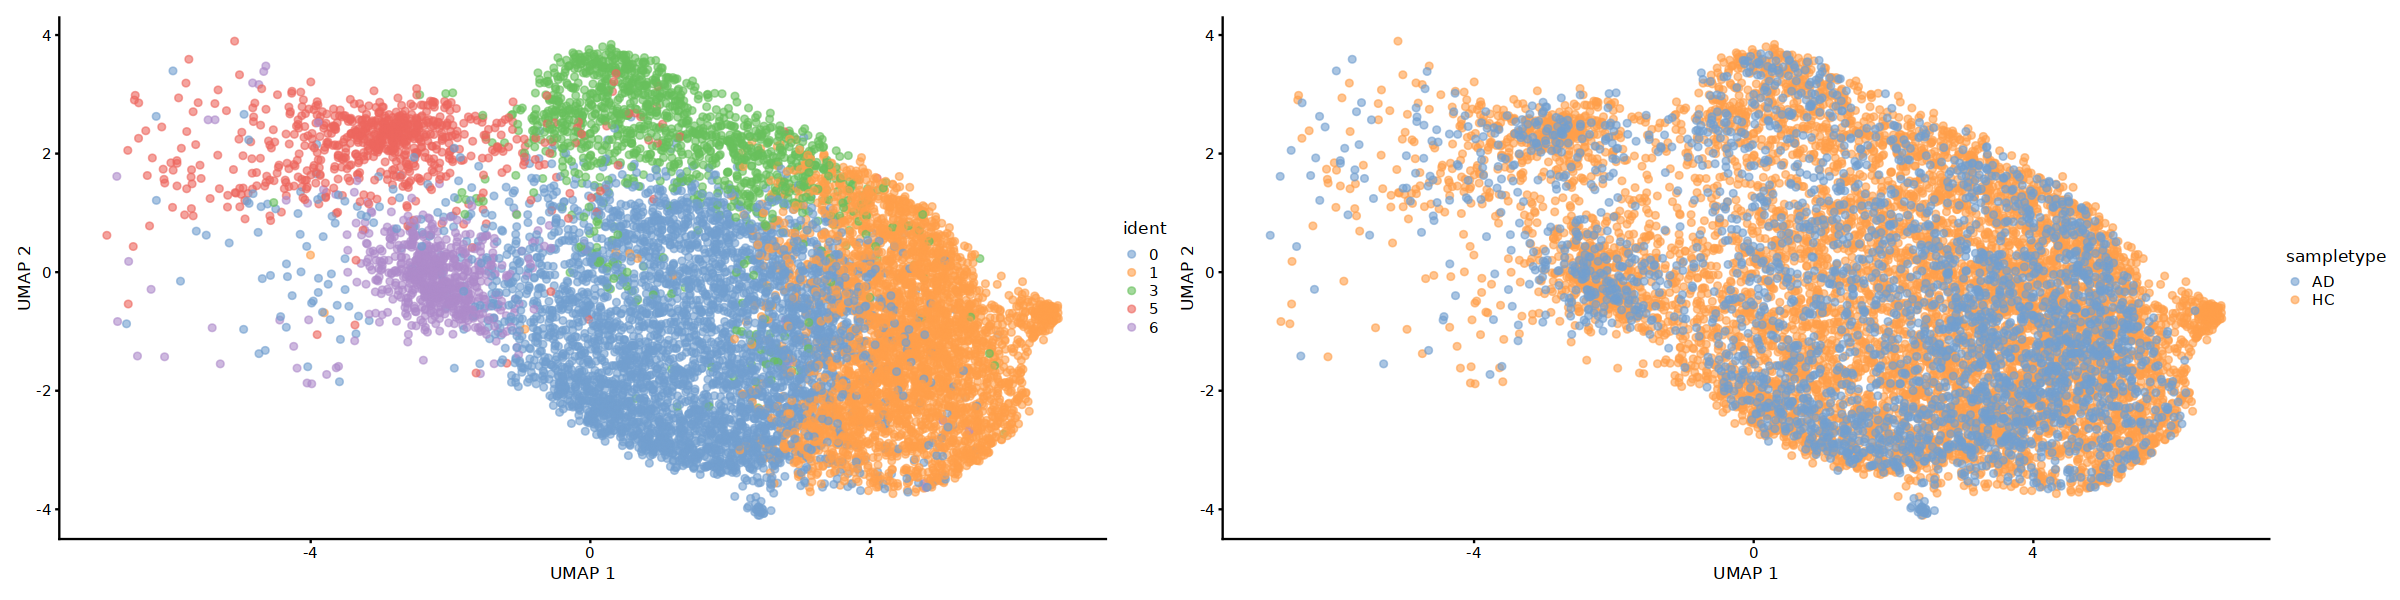

In [5]:
#create milo object
library(miloR)
set.seed(8)
milo.sceCD4 <- Milo(sceCD4)
reducedDim(milo.sceCD4, "UMAP") <- reducedDim(sceCD4, "UMAP")
reducedDim(milo.sceCD4, "PCA") <- reducedDim(sceCD4, "PCA")
options(repr.plot.width = 20, repr.plot.height = 5)
plotUMAP(milo.sceCD4, colour_by="ident") + plotUMAP(sceCD4, colour_by="sampletype")

In [6]:
milo.sceCD4=buildGraph(milo.sceCD4, k = 20, d = 30)

Constructing kNN graph with k:20



In [7]:
milo.sceCD4 <- makeNhoods(milo.sceCD4, prop = 0.1, k = 20, d=30, refined = TRUE, refinement_scheme="graph") 

Checking valid object

Running refined sampling with graph



need to peak around 5*N samples meaning we have about 50 ish as the peak neighbourhood size.

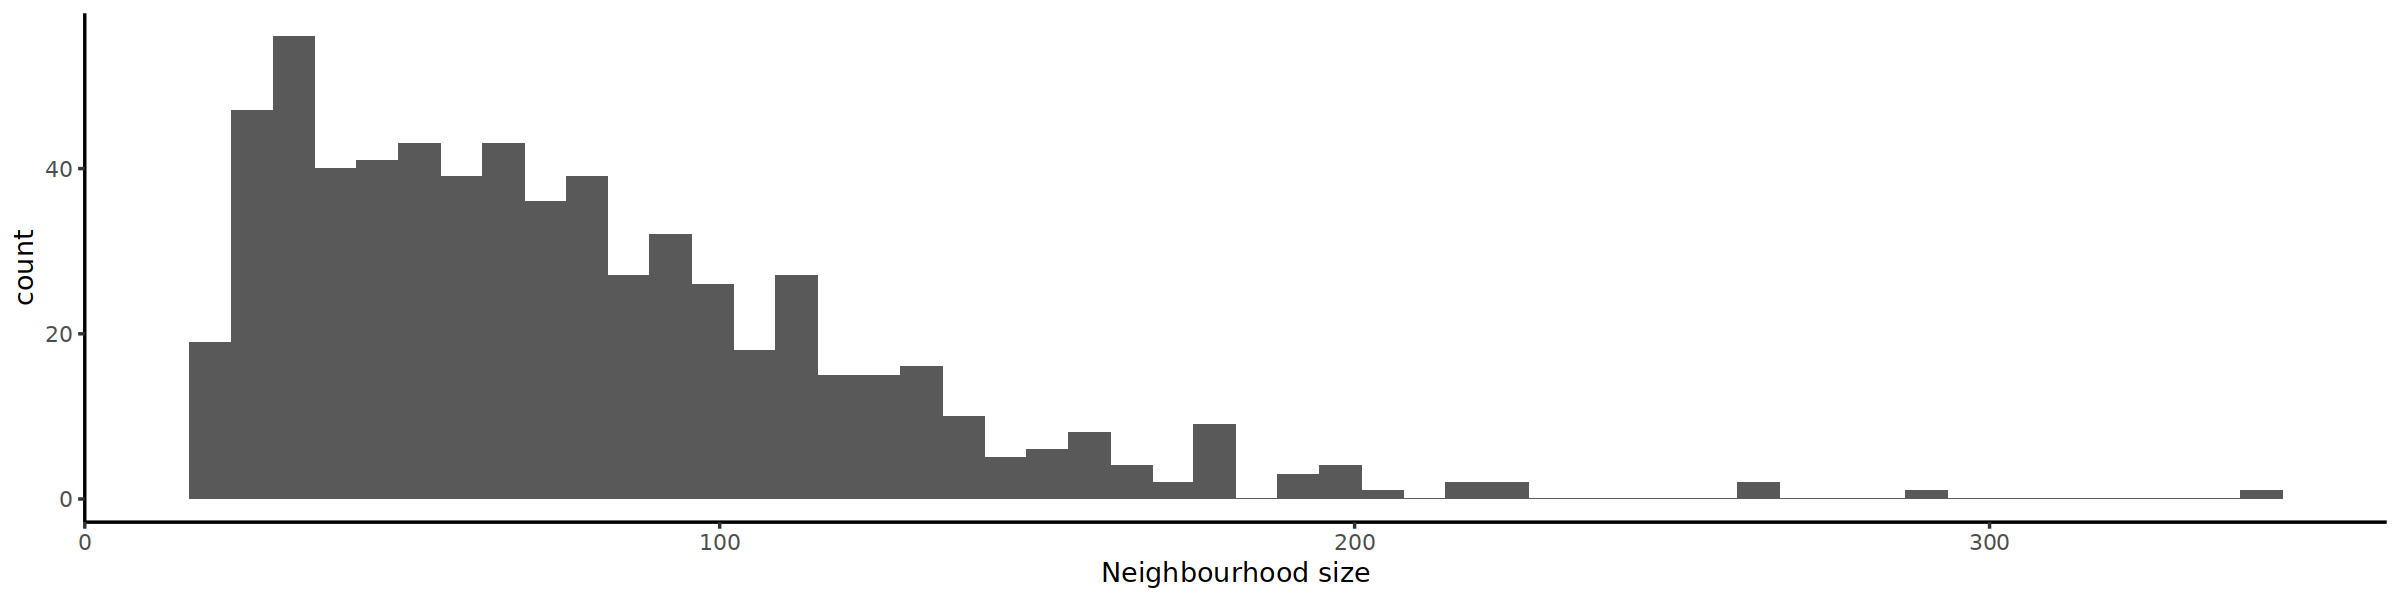

In [8]:
plotNhoodSizeHist(milo.sceCD4)

In [9]:
colData(milo.sceCD4)

DataFrame with 10094 rows and 47 columns
                                         rowname  seq_folder      nUMI
                                     <character> <character> <numeric>
HC_HC1_AAACCTGGTTCTGAAC-1 HC1_AAACCTGGTTCTGAAC-1         HC1      3192
HC_HC1_AAACGGGAGCCAGAAC-1 HC1_AAACGGGAGCCAGAAC-1         HC1      2322
HC_HC1_AAAGATGAGGGCTTCC-1 HC1_AAAGATGAGGGCTTCC-1         HC1      4062
HC_HC1_AAAGATGGTGAACCTT-1 HC1_AAAGATGGTGAACCTT-1         HC1      3187
HC_HC1_AAAGATGGTTAAGAAC-1 HC1_AAAGATGGTTAAGAAC-1         HC1      2112
...                                          ...         ...       ...
AD_AD4_TTTATGCAGAAACCTA-1 AD4_TTTATGCAGAAACCTA-1         AD4      4045
AD_AD4_TTTATGCGTATATGAG-1 AD4_TTTATGCGTATATGAG-1         AD4      7655
AD_AD4_TTTCCTCAGACTCGGA-1 AD4_TTTCCTCAGACTCGGA-1         AD4      4027
AD_AD4_TTTGGTTCATTCCTGC-1 AD4_TTTGGTTCATTCCTGC-1         AD4      3479
AD_AD4_TTTGTCACAAAGCAAT-1 AD4_TTTGTCACAAAGCAAT-1         AD4      2175
                              nGene 

In [10]:
milo.sceCD4<- countCells(milo.sceCD4, meta.data = data.frame(colData(milo.sceCD4)), samples="samplerep") #count cells per unique biological rep

Checking meta.data validity

Counting cells in neighbourhoods



In [11]:
head(nhoodCounts(milo.sceCD4))

  [[ suppressing 13 column names ‘HC1’, ‘HC2’, ‘HC3’ ... ]]



6 x 13 sparse Matrix of class "dgCMatrix"
                                    
1  3  3  4 40 . .  . 2  .  1  9  . .
2 15 11 11 28 . . 13 8  7 17  9  5 4
3  9 15 25 10 1 5  7 6 22 16 18  8 9
4  2 17  6  7 1 .  6 6  7 15 13  6 3
5  9  1 12  7 . .  4 2  8 12  8  6 2
6 22 32 37 16 1 4  1 6 15 57 45 22 8

**experimental design**

In [12]:
design <- data.frame(colData(milo.sceCD4))[,c("samplerep", "sampletype")]
## Convert info from integers to factor
design$samplerep <- as.factor(design$samplerep) 
design$sampletype <- as.factor(design$sampletype)
design$sampletype <- relevel(design$sampletype, "HC")
# simplify data frame to only distinct combinations conditions
design <- distinct(design)

In [13]:
rownames(design) <- design$samplerep
design

,samplerep,sampletype
,<fct>,<fct>
HC1,HC1,HC
HC2,HC2,HC
HC3,HC3,HC
HC4,HC4,HC
HC5,HC5,HC
HC6,HC6,HC
HC7,HC7,HC
HC8,HC8,HC
HC9,HC9,HC


In [14]:
all(colnames(nhoodCounts(milo.sceCD4))==design$samplerep)

[1] TRUE

In [21]:
milo.sceCD4 <- calcNhoodDistance(milo.sceCD4, d=30,reduced.dim = "PCA",use.assay = "logcounts")

In [22]:
da_results <- testNhoods(milo.sceCD4, design = ~ sampletype, design.df = design)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



In [23]:
table(da_results$SpatialFDR < 0.1)


FALSE  TRUE 
  636     3 

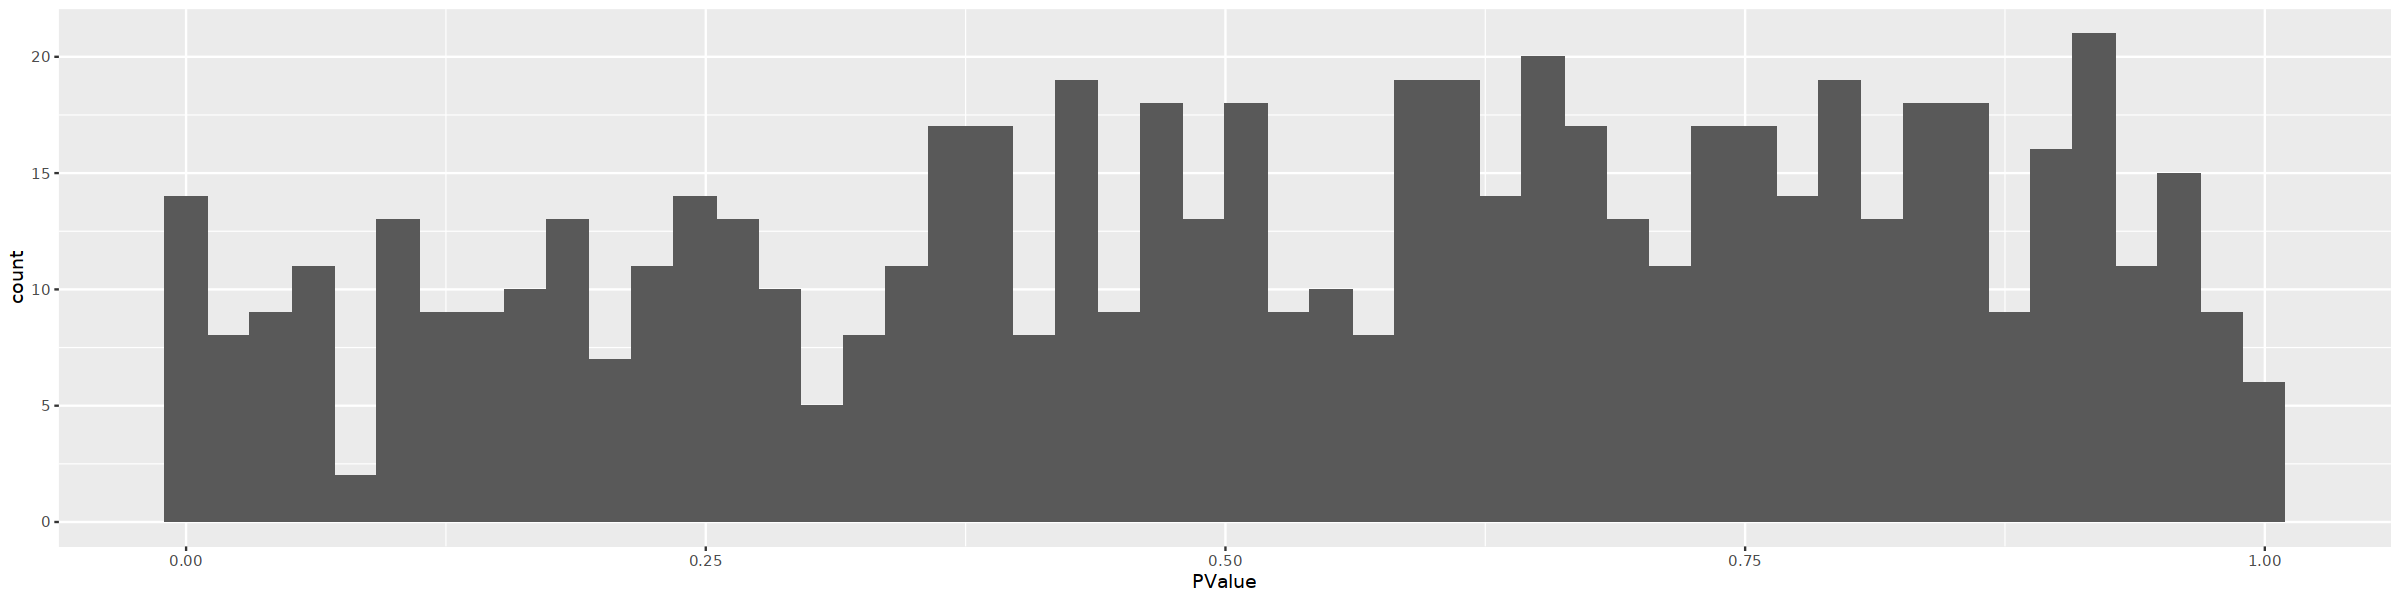

In [24]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=50)

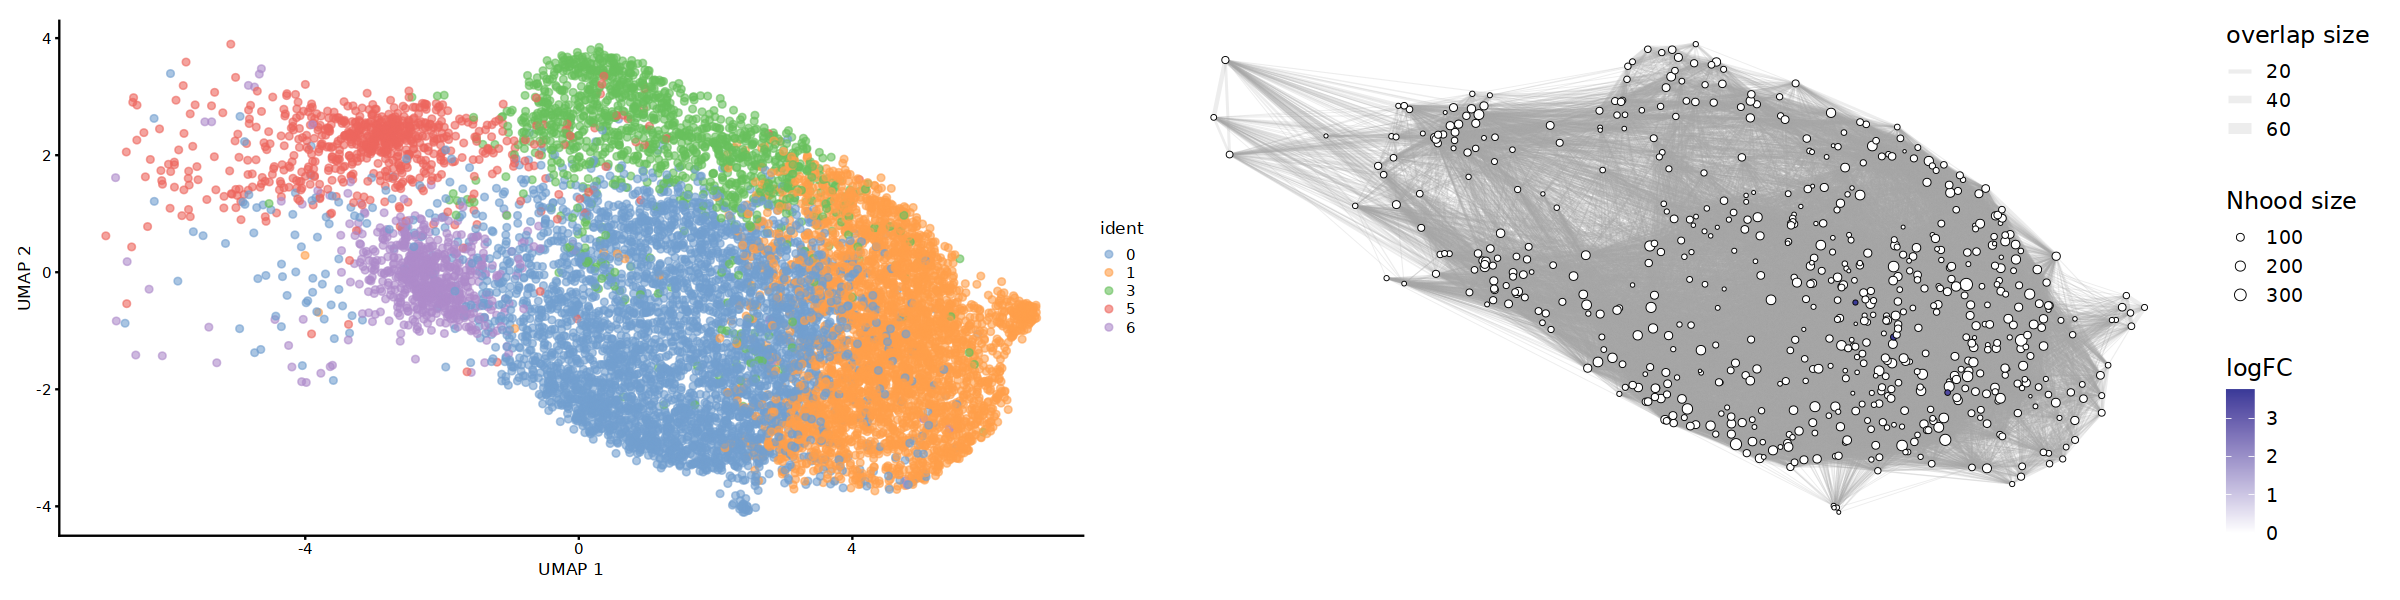

In [25]:
milo.sceCD4 <- buildNhoodGraph(milo.sceCD4)

plotUMAP(milo.sceCD4, colour_by="ident") + plotNhoodGraphDA(milo.sceCD4, da_results, alpha=0.1) +
  plot_layout(guides="auto" )

In [26]:
da_results <- annotateNhoods(milo.sceCD4, da_results, coldata_col = "ident")
head(da_results)

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,ident,ident_fraction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,-1.2521003,10.79254,1.2521416,0.27267503,0.9896951,1,0.990546,5,0.7258065
2,-0.2748177,11.65876,0.1893612,0.66408446,0.9896951,2,0.990546,0,0.9609375
3,0.2218418,11.92368,0.1505340,0.69858452,0.9896951,3,0.990546,1,0.7218543
4,0.5387365,11.26148,0.6542751,0.41989027,0.9896951,4,0.990546,3,0.8426966
5,0.5059896,10.98592,0.5386153,0.46417135,0.9896951,5,0.990546,6,0.5774648
6,1.1277649,12.47901,4.3386074,0.03898231,0.9211109,6,0.982468,0,0.9849624


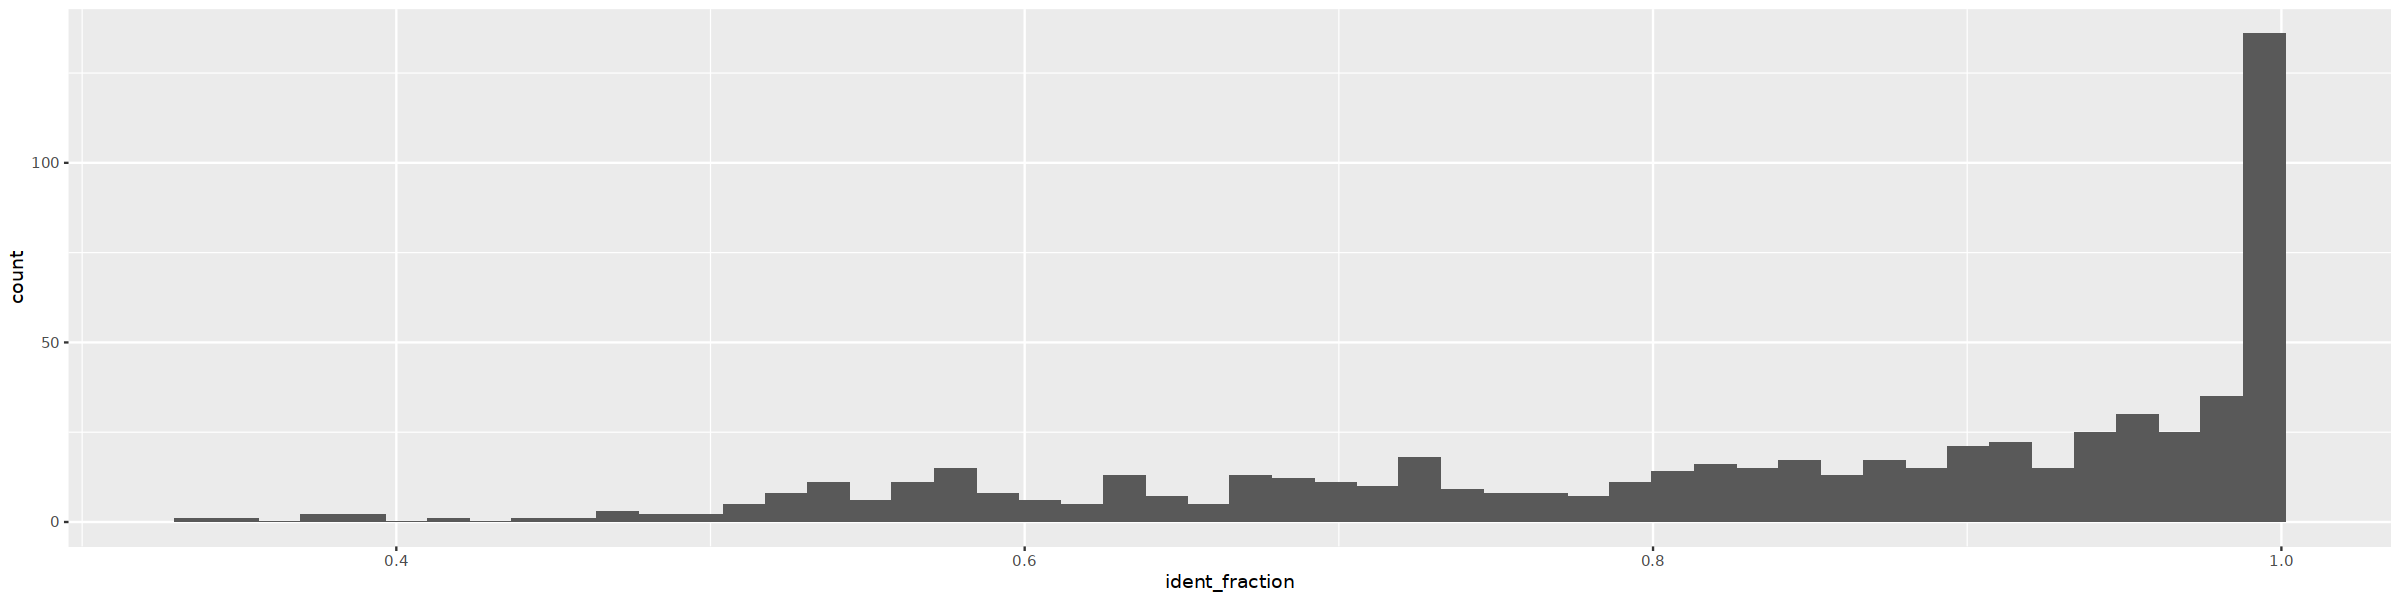

In [28]:
ggplot(da_results, aes(ident_fraction)) + geom_histogram(bins=50)

In [30]:
da_results$celltype <- ifelse(da_results$ident_fraction < 0.7, "Mixed", da_results$ident)

Converting group_by to factor...



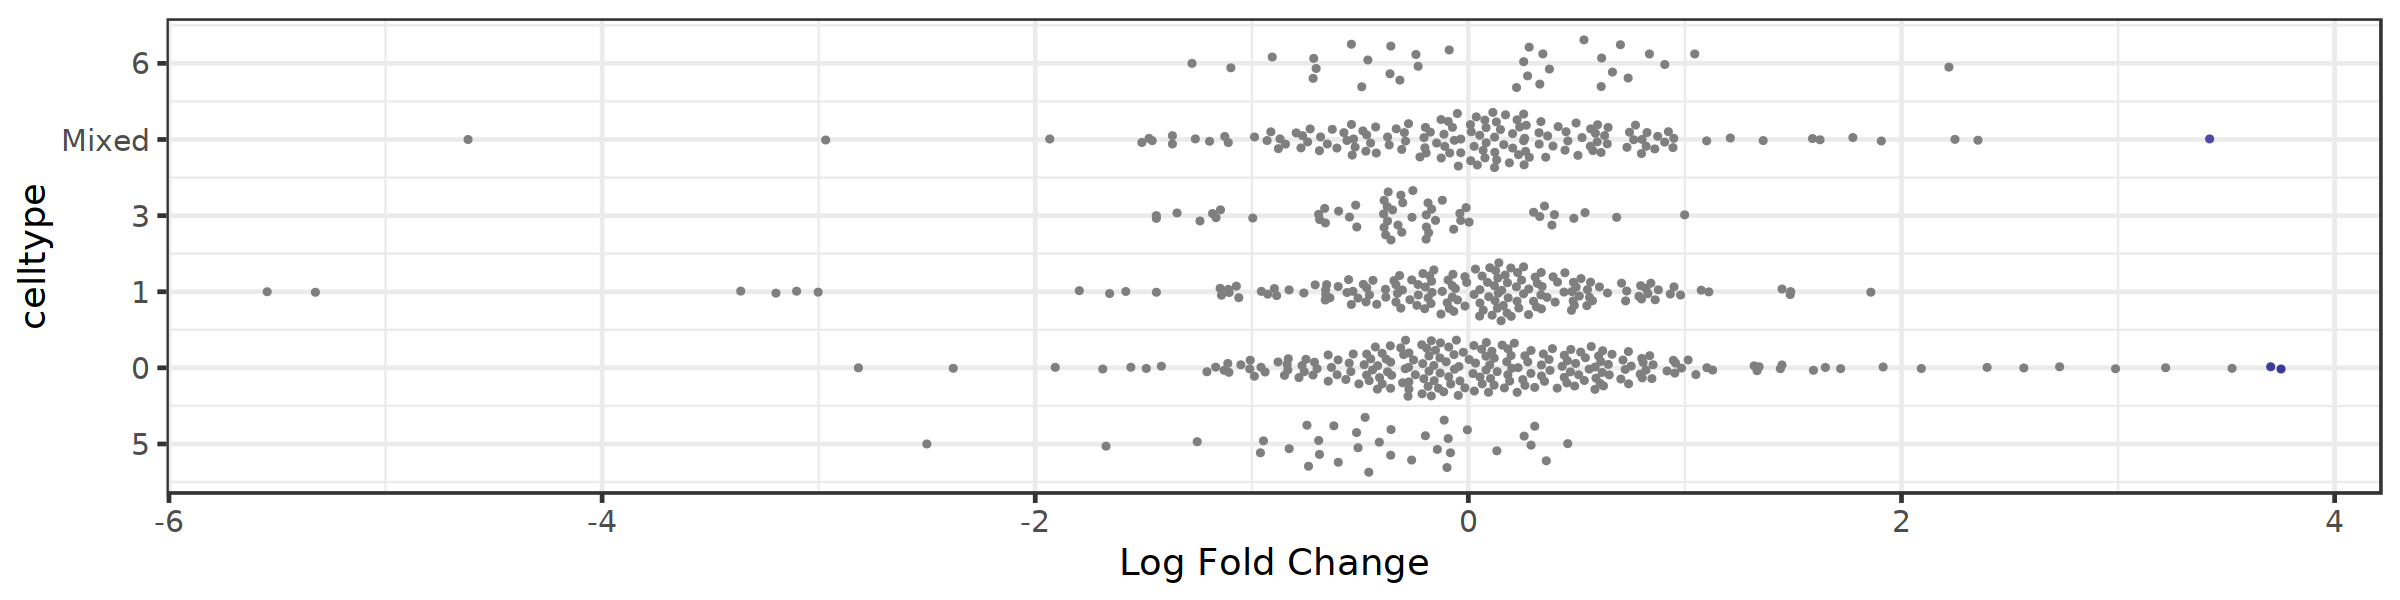

In [31]:
plotDAbeeswarm(da_results, group.by = "celltype")

**now try CD8 pop**

In [ ]:
t.cells=readRDS(file="./GSE134577-csf/reclust.t.cells.RDS")
Idents(object = t.cells) <- 't.cells.snn_res.0.5'
CD8cells=subset(t.cells,idents = c(2,7,4), invert = F) ## INVERT == FALSE

DefaultAssay(t.cells) <- "RNA"


sceCD8 <-  as.SingleCellExperiment(CD8cells,assay="RNA")
sceCD8=sceCD8[,sceCD8$sampletype%in%c("AD","HC")]
CD8cells=subset(x = CD8cells, subset = (sampletype == "HC" | sampletype == "AD"))
AD_and_HCcells=colnames(sceCD8[sceCD8$sampletype %in% c("AD", "HC"),])
options(future.globals.maxSize = 4000 * 1024^2)
#put back the PC and UMAP embeddings
# Put back the PC and UMAP embeddings for the subset
sceCD8@int_colData@listData$reducedDims$UMAP <- CD8cells@reductions$umap@cell.embeddings[AD_and_HCcells, , drop = FALSE]
sceCD8@int_colData@listData$reducedDims$PCA <- CD8cells@reductions$pca@cell.embeddings[AD_and_HCcells, , drop = FALSE]
#check that we only have 3 clusters
colLabels(sceCD8)=CD8cells@active.ident
colLabels(sceCD8)

#QC that we only have AD and HC samples
dim(counts(sceCD8))
levels(factor(colData(sceCD8)$sampletype))

logcounts(sceCD8) <-log(counts(sceCD8)+1)
sceCD8@int_colData@listData$reducedDims$UMAP <- CD8cells@reductions$umap@cell.embeddings[AD_and_HCcells, , drop = FALSE]
sceCD8@int_colData@listData$reducedDims$PCA <- CD8cells@reductions$pca@cell.embeddings[AD_and_HCcells, , drop = FALSE]


set.seed(8)
milo.sceCD8 <- Milo(sceCD8)
reducedDim(milo.sceCD8, "UMAP") <- reducedDim(sceCD8, "UMAP")
reducedDim(milo.sceCD8, "PCA") <- reducedDim(sceCD8, "PCA")
options(repr.plot.width = 20, repr.plot.height = 5)
plotUMAP(milo.sceCD8, colour_by="ident") + plotUMAP(sceCD8, colour_by="sampletype")

Constructing kNN graph with k:25

Checking valid object

Running refined sampling with graph



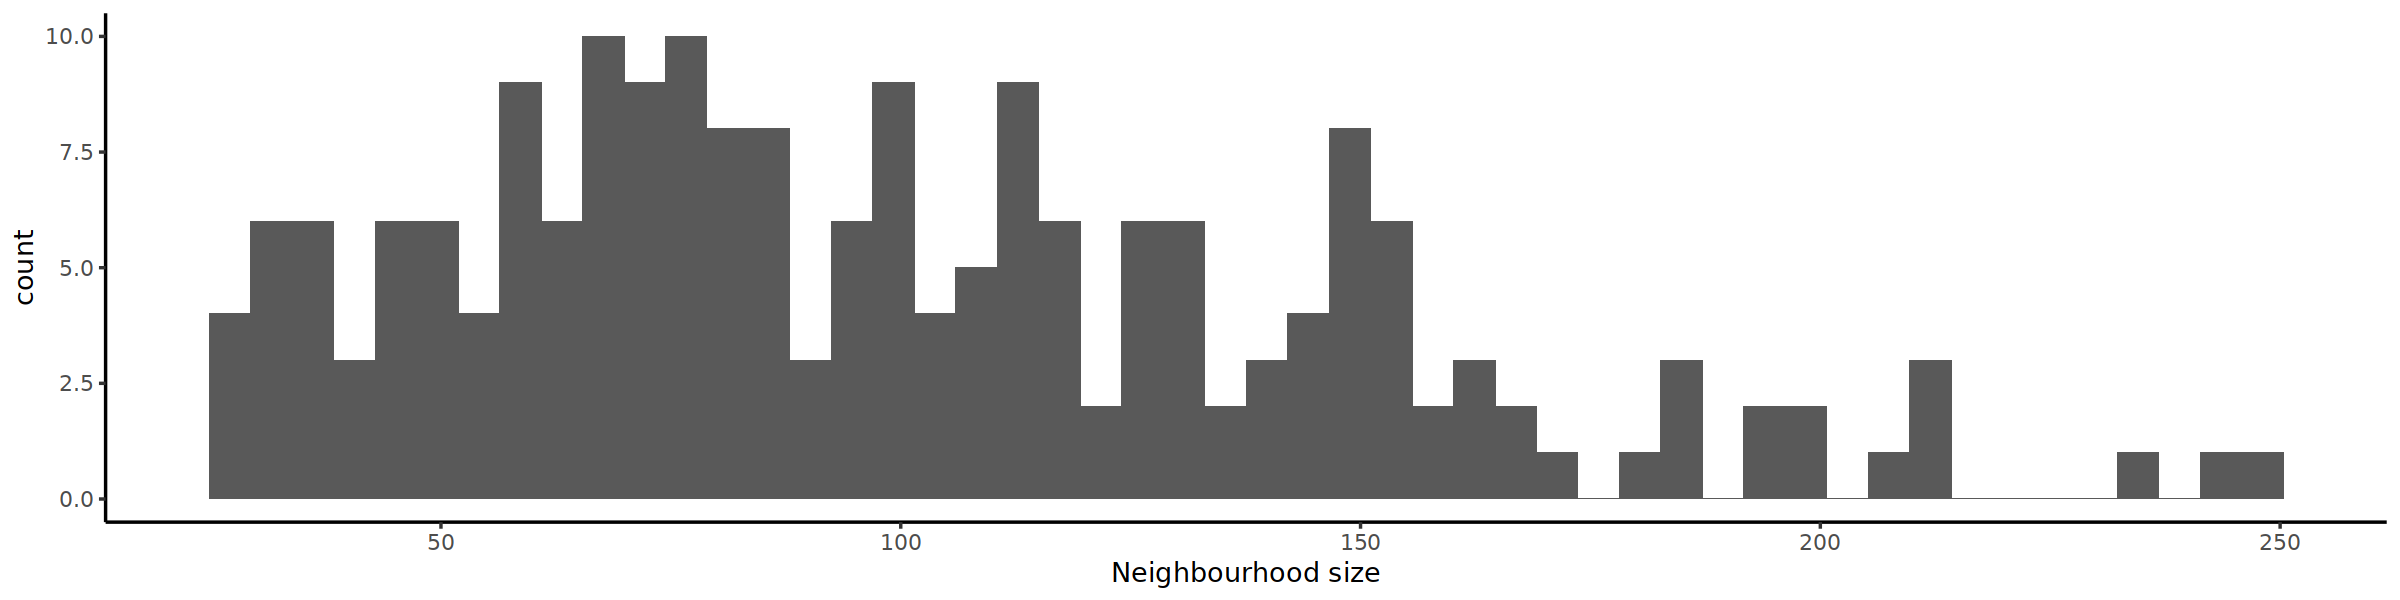

In [35]:
milo.sceCD8=buildGraph(milo.sceCD8, k = 25, d = 30)
milo.sceCD8 <- makeNhoods(milo.sceCD8, prop = 0.1, k = 25, d=30, refined = TRUE, refinement_scheme="graph") 
plotNhoodSizeHist(milo.sceCD8)

In [36]:
milo.sceCD8<- countCells(milo.sceCD8, meta.data = data.frame(colData(milo.sceCD8)), samples="samplerep") #count cells per unique biological rep
design <- data.frame(colData(milo.sceCD8))[,c("samplerep", "sampletype")]
## Convert info from integers to factor
design$samplerep <- as.factor(design$samplerep) 
design$sampletype <- as.factor(design$sampletype)
design$sampletype <- relevel(design$sampletype, "HC")
# simplify data frame to only distinct combinations conditions
design <- distinct(design)
rownames(design) <- design$samplerep
design
all(colnames(nhoodCounts(milo.sceCD8))==design$samplerep)
milo.sceCD8 <- calcNhoodDistance(milo.sceCD8, d=30,reduced.dim = "PCA",use.assay = "logcounts")

Checking meta.data validity

Counting cells in neighbourhoods



,samplerep,sampletype
,<fct>,<fct>
HC1,HC1,HC
HC2,HC2,HC
HC3,HC3,HC
HC4,HC4,HC
HC5,HC5,HC
HC6,HC6,HC
HC7,HC7,HC
HC8,HC8,HC
HC9,HC9,HC


[1] TRUE

In [37]:
da_results <- testNhoods(milo.sceCD8, design = ~ sampletype, design.df = design)
table(da_results$SpatialFDR < 0.1)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting




FALSE 
  197 